# Python Data Visualization
## Matplotlib - Advanced
***
This notebook covers:
- Classes
- Objects
***

## Introduction to Classes and Objects


Welcome to this advanced course on Matplotlib. You will learn how to use the library in new ways and discover new types of graphics. <br>

In the previous module, you learned how to create and manipulate different types of graphics using the **`matplotlib.pyplot`** module, but that is not the only way to use `Matplotlib`. <br>

The **object-oriented** method is the most appropriate method for interacting with Matplotlib in Python. It is also the most powerful way to program with `Matplotlib`, as it allows complete control over the result, even if it is more complex. <br>

In the previous course, no reference was made to objects; the various objects were created automatically in the background when `pyplot` functions were called. <br>

The most commonly used objects are those of the “Figure” and “Axes” classes. For more details, see the [online documentation](http://matplotlib.org/contents.html). <br>

In the following, we will mainly use objects, but also “pyplot” for some elementary instructions. <br>

Using the functions seen in the previous module, the following code generates:
```python
x = np.arange(0, 10, 0.1)
y = np.random.randn(len(x))
plt.plot(x, y)
plt.title('Random Numbers')
```
the graphic: <br>
<img src="../imgs/exemple.png" style="height:200px">

With the **`pyplot`** module, calling the `plot` function automatically creates a **`Figure`** by hiddenly calling the `figure` function. A graph (object **‘Axes’**) is also automatically integrated into it. <br>

It is possible to create these objects explicitly, making them easier to manipulate directly. <br>

Here is the same code rewritten in object-oriented style:
```python
x = np.arange(0, 10, 0.1)
y = np.random.randn(len(x))
fig = plt.figure()
ax = fig.add_subplot(111)
l = ax.plot(x, y)
t = ax.set_title('Random Numbers')
```

Here we create a figure named **fig**, to which we add a plot **ax** using the `add_subplot` method. <br>
The "plot" function, which is applied to the plot **ax**, returns a list of Line2D elements, one for each line (in this case there is only one). <br>
In the above code, **l** is a reference to the line object, so that any operation that is allowed on a Line2D object can be executed with **l**, which allows much more customization possibilities. <br>
If you want to change the color of the line later, after calling the `plot` function, it is possible to use `l.set_color('red')` instead of changing the argument in the function. <br>

#### Please run the following cell first

In [1]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np

To create a plot, we need a figure. The function `plt.figure` returns a figure to which we can add one or more plots (objects 'Axes'). The arguments `figsize` and `facecolor` change the size and background color of the figure respectively. <br>
<br>
The function `fig.add_subplot(111)` returns an Axes object on which a plot can be drawn. <br>
It is the most common way to add 'Axes' to a figure. The method `add_subplot` adds a '**`subplot`**' and has 3 parameters: `numrows, numcols, fignum`. <br>

* *numrows* represents the number of rows of *subplots* to be instantiated
* *numcols* represents the number of columns of *subplots* to be instantiated
* *fignum* varies from $1$ to $num_{rows} \times num_{cols}$ and represents the number of the *subplot* to be used
<span style="color:#09b038; text-decoration : underline">Examples:</span><br>
`ax = fig.add_subplot(1, 1, 1)`, is used when only one plot is needed. <br>
`ax2 = fig.add_subplot(212)`, divides the figure into 2 subplots over 2 rows and indicates that we want to work on the second one. <br>
Once 'Axes' objects have been created, the plot method is applied to the last created instance if none is specified. <br>
To explicitly add content to one of the plots, apply the usual functions as methods to 'Axes'. <br>
<span style="color:#09b038; text-decoration : underline">Example:</span><br>
`plt.barplot()` becomes `ax.barplot()`
#### 1.1 Exercises:
> (a) Create using the functions **`plt.figure`** and **`add_subplot`** a figure named '**`fig`**' with size `(8,4)`, consisting of two plots '**`ax1`**' and '**`ax2`**' that are positioned side by side on the same row. <br>
>
> (b) Draw in the first subplot a green curved line that goes through the points `(0,1), (2,3), (3,2)`. <br>
>
> (c) Draw in the second subplot the histogram from the following list of elements: `[1, 2, 2, 2, 3, 3, 4, 5, 5]`.

In [2]:
# Deine Lösung:





#### Lösung:

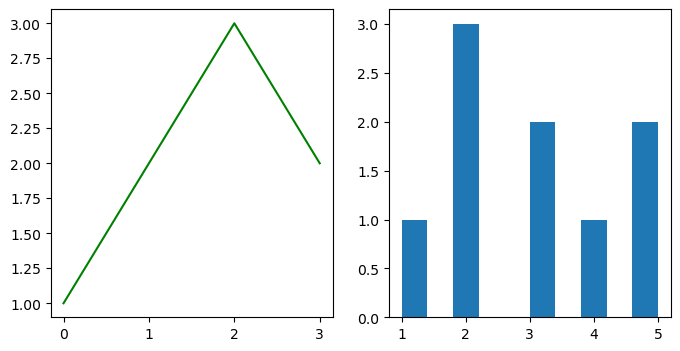

In [3]:
fig = plt.figure(figsize=(8,4))
# We create a figure
ax1 = fig.add_subplot(121)
# We add the first plot to the figure, which is divided into 2 columns
ax2 = fig.add_subplot(122)
# We add the second subplot
ax1.plot([0, 2, 3], [1, 3, 2], 'green')
# In the first plot we add a line plot
ax2.hist([1, 2, 2, 2, 3, 3, 4, 5, 5]);
# In the second one we create a histogram
# It would also be possible to use the functions plt.plot() and plt.hist(),
# but we prefer to use objects here to better understand their usage

#### Multiple Figures
With `Matplotlib` it is possible to draw multiple figures by calling the function **`figure`** multiple times in succession. The figures can then be used in the same way as a single figure. <br>
> (d) Display the same plots as in the previous exercise, but on two different figures, named '**`fig1`**' and '**`fig2`**'.

In [4]:
# Your Solution:





#### Solution:

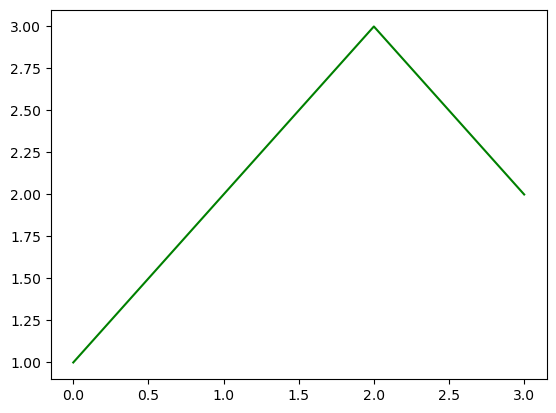

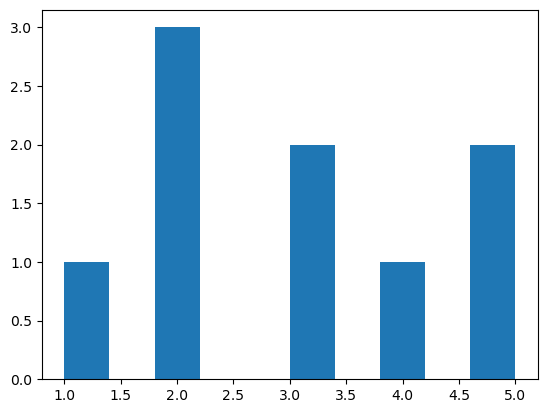

In [5]:
fig1 = plt.figure()
ax1 = fig1.add_subplot(111)
ax1.plot([0, 2, 3], [1, 3, 2], 'green')

fig2 = plt.figure()
ax2 = fig2.add_subplot(111)
ax2.hist([1, 2, 2, 2, 3, 3, 4, 5, 5]);

#### Labeling Axes
The commands `set_xlabel` and `set_ylabel` assign labels to the x and y axes of a plot, just like the functions `xlabel` and `ylabel` from `pyplot`. <br>
##### Adding Axes
In some situations it is possible to display two different data series in the same plot with different labels. With the function `twinx` we can create a new pair of axes within an existing plot with a different label on the y-axis. Conversely, with `twiny` we can share the ordinate axis and have different abscissas. <br>
<span style="color:#09b038; text-decoration : underline">Example: Creating a new pair of axes</span><br>
The code
```python
x = np.arange(-10, 10, 0.1)
y1 = x**2
y2 = x**3
fig = plt.figure()
ax1 = fig.add_subplot(111)
ax1.plot(x, y1)
ax1.set_ylabel('x squared')
ax2 = ax1.twinx()   # The important line!
ax2.plot(x, y2, 'r')
ax2.set_ylabel('x cubed')
```
produces the following plot:<br>
<img src="../imgs/twinx.png" style="height:250px">
<br>
A second 'Axes' object is created with the function `twinx` and overlaid on the first one. Therefore, it is necessary to give the second curve a different color, otherwise it would be blue as with a new plot. <br>
> (e) Create a sequence **`x`** between `0.1` and the constant **`e`** with a step size of `0.01`. <br>
>
> (f) Create the series **`y1`** and **`y2`**, which correspond to $exp(-x)$ and $log(x)$ respectively. <br>
>
> (g) Display in the same figure **`fig`** the curves for `(x, y1)` and `(x, y2)` with two different Y-axes, the first with the label 'Values of Y for exp(-x)' and the second with the label 'Values of Y for ln(x)'. <br>
<div class="alert alert-success">
<i class="fa fa-question-circle"></i> &emsp; 
The number <b>e</b> (approximately 2.718) as well as the exponential and logarithm functions are provided in the numpy module.
</div>

In [6]:
# Your Solution:




#### Solution:

Text(0, 0.5, 'Y values for ln(x)')

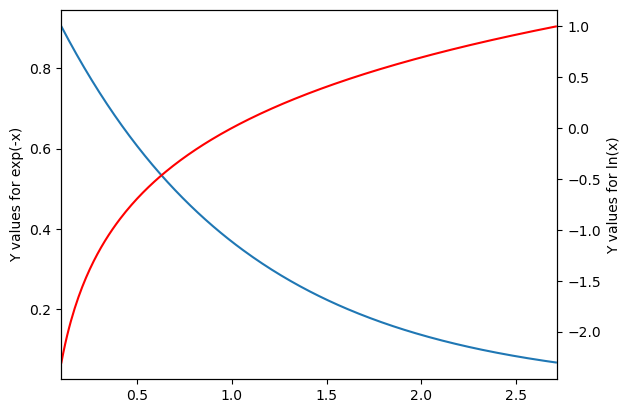

In [7]:
x = np.arange(0.1, np.e, 0.01)
y1 = np.exp(-x)
y2 = np.log(x)

fig = plt.figure()
ax1 = fig.add_subplot(111)
ax1.plot(x, y1)
ax1.set_ylabel('Y values for exp(-x)')

ax2 = ax1.twinx() # wichtige Funktion!
ax2.plot(x, y2, 'r')
ax2.set_xlim([0.1, np.e])
ax2.set_ylabel('Y values for ln(x)')

#### Sharing an Axis
Sometimes it is preferable to display **multiple plots** in the same figure as *subplots* and share an axis, using the arguments `sharex` and `sharey` of the `add_subplot` function. <br>
It is also possible to use these two arguments together, which can be useful when different data have the same unit of measurement. <br>
<span style="color:#09b038; text-decoration : underline">Example: Drawing multiple plots</span><br>
The code
```python
x = np.arange(11)
fig = plt.figure()
ax1 = fig.add_subplot(311)
ax1.plot(x, x)
ax2 = fig.add_subplot(312, sharex=True)
ax2.plot(2*x, 2*x)
ax3 = fig.add_subplot(313, sharex=True)
ax3.plot(3*x, 3*x)
```
produces the following figure:<br>
<img src="../imgs/sharex.png" style="height:250px">
<br>
The x-axis ranges from `0` to `30`, because the limits are adjusted to display all plots in the figure. <br>
> (h) Create a sequence of numbers from `0` to `10` with a step size of `0.01`. <br>
>
> (i) Create a figure named **`fig`**, into which we insert 4 'Axes' objects using the function **`add_subplot`**. <br>
>
> (j) In the first one, '**`ax1`**', we draw the line **`(x, sin(x))`**. <br>
>
> (k) In the second one, '**`ax2`**', the line **`(-x, cos(x))`**. <br>
>
> (l) In the third one the line **`(x*2, sin(x*2))`**, which shares the x-axis with **`ax1`**. <br>
>
> (m) In the fourth one the line **`(x, cos(x))`**, which shares the x-axis with **`ax2`**.

In [8]:
# Your Solution:





#### Solution:

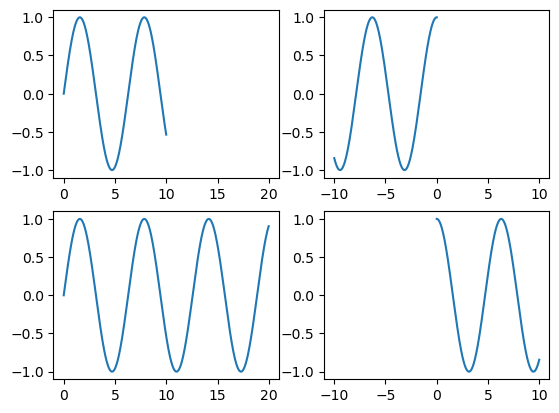

In [9]:
x = np.arange(0,10,0.01)

fig = plt.figure()
ax1 = fig.add_subplot(221)
ax1.plot(x, np.sin(x));
ax2 = fig.add_subplot(222)
ax2.plot(-x, np.cos(x));
ax3 = fig.add_subplot(223, sharex=ax1)
ax3.plot(x*2, np.sin(x*2));
ax4 = fig.add_subplot(224, sharex=ax2)
ax4.plot(x, np.cos(x));

#### 
Figures, plots and subplots can be created with a single command, thanks to the function `plt.subplots` (note the **s**), which takes the number of rows and columns as input. <br>
 Here the arguments `sharex` and `sharey` are boolean values **True** or **False**, which allow the axes of the plots to be adjusted uniformly or differently. <br>
 <span style="color:#09b038; text-decoration : underline"> Example: Using the function **plt.subplots** </span><br> 
 `fig,axes = plt.subplots(3,2,sharex=True,sharey=True)`
 The array *axes* contains all created subplots. To access the plot in the $i.$ row and the $j.$ column, one can use `axes[i,j]`. <br>
* **(o)** Create a figure with four subplots in two different rows and columns that share the same axes <br>
* **(p)** Add to each plot using two **for** loops a black histogram with 500 random values from **`np.random.randn`** in 50 intervals. Set the transparency (*alpha*) to 0.5 <br>
<div class="alert alert-info">
<i class="fa fa-info-circle"></i> &emsp; 
    The parameter <b>alpha</b> exists for all plots and controls the degree of transparency (0 = transparent, 1 = opaque).</div>

In [10]:
# Your Solution:





#### Solution:

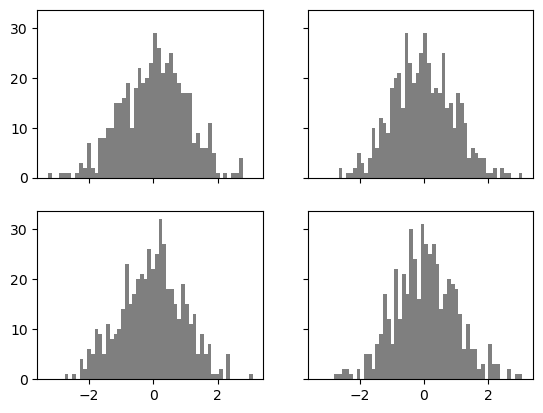

In [11]:
fig,axes = plt.subplots(2,2,sharex=True,sharey=True)
# The four subplots were created.
# Sharex and sharey indicate that the subplots have the same axes
for i in range(2):
    for j in range(2):
        axes[i,j].hist(np.random.randn(500), bins=50, color='black', alpha=0.5)
# The object "axes" is a 2D array, easy to index and iterate through